In [2]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.7 MB/s eta 0:00:00


In [3]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import demoji
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
import pickle

Mounted at /content/drive


In [4]:
with open('drive/Shareddrives/CS 152/Classifier/LRmodel_pipe_cyberbullying.pkl','rb') as f:
  pipe_model=pickle.load(f)

In [5]:
def evaluate(text, pipe_model):
  if type(text)==str:
    text=[text]
  output = pipe_model.predict(text)
  return output


Function to clean tweets of junk characters.

In [6]:
def clean_text(text):
    
    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    # Make all text lowercase
    text = text.lower()
    
    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)

    # Taking care of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [8]:
df = pd.read_csv('cyberbullying_dataset.csv', encoding='utf-8', error_bad_lines=False)

df

<ipython-input-8-81664a0ec050>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('cyberbullying_dataset.csv', encoding='utf-8', error_bad_lines=False)


,tweet_text,cyberbullying_type
0,Worm is about a bullied girl in High School wh...,age
1,Did they though? How many kids killing themsel...,age
2,The Congressmen's & Senator's daughters that I...,age
3,Well it's probably mostly bts. I heard a girl ...,age
4,It's almost like that whole school of argument...,age
...,...,...
47687,A false profit that says the right things. But...,religion
47688,Thats a fair question. I think the Iran deal i...,religion
47689,Arguing with idiot is wasting time What about ...,religion
47690,@ummayman90 As a percentage there are very few...,religion


In [9]:
text = []

Cleaning tweets.

In [10]:
for sentence in df['tweet_text']:
    clean_sentence = clean_text(sentence)
    text.append(sentence) 

In [13]:
predictions = []

47692


Running evaluation.

In [14]:
for sentence in text:
    prediction = evaluate(sentence, pipe_model)
    prediction_value = prediction[0]
    predictions.append(prediction_value)

In [16]:
df['predictions'] = predictions

In [18]:
label2class={"not_cyberbullying": 0, "gender": 1, "religion": 2, "age": 3,  "ethnicity": 4,"other_cyberbullying":5}

In [19]:
df_replace = df

In [20]:
df_replace['cyberbullying_type'] = df_replace['cyberbullying_type'].replace(label2class)

In [21]:
df_replace

,tweet_text,cyberbullying_type,predictions
0,Worm is about a bullied girl in High School wh...,3,3
1,Did they though? How many kids killing themsel...,3,3
2,The Congressmen's & Senator's daughters that I...,3,5
3,Well it's probably mostly bts. I heard a girl ...,3,3
4,It's almost like that whole school of argument...,3,3
...,...,...,...
47687,A false profit that says the right things. But...,2,2
47688,Thats a fair question. I think the Iran deal i...,2,2
47689,Arguing with idiot is wasting time What about ...,2,2
47690,@ummayman90 As a percentage there are very few...,2,2


Pulling all false predictions.

In [22]:
mask = df['cyberbullying_type'] == df['predictions']

df = df[~mask]

df_false = df.reset_index(drop=True)

In [23]:
df_false

,tweet_text,cyberbullying_type,predictions
0,The Congressmen's & Senator's daughters that I...,3,5
1,@ThaArsonist leave that little person alone......,3,5
2,"Everyone tweeting ""this tweet/ your tweet/ you...",3,0
3,RT @AuthorNinaPerez: How about they're ALL nas...,3,5
4,//It's getting late here. My writing pace is s...,3,0
...,...,...,...
6571,YOU spend my tax dollars to fund religious sch...,2,3
6572,Somalis aren’t black. So many Arabs and Asians...,2,4
6573,Before ANYBODY can support the process this ba...,2,0
6574,@zaidbenjamin Daesh really go to extremes to s...,2,0


In [24]:
actual_labels = df_replace['cyberbullying_type']
predicted_labels = df_replace['predictions']

In [25]:
from sklearn.metrics import confusion_matrix as cm
confusion_matrix = cm(actual_labels, predicted_labels)

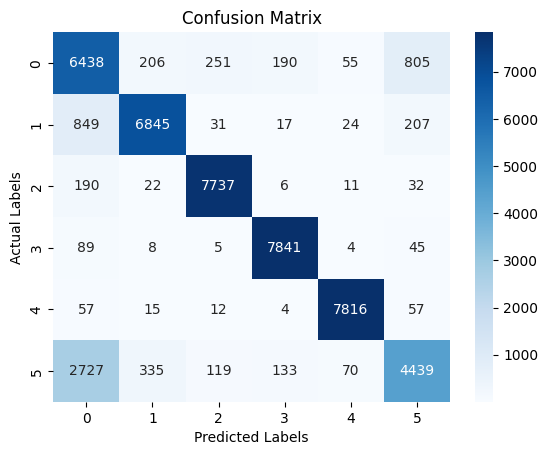

In [26]:
# Plotting the confusion matrix as a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')

plt.show()

In [27]:
df_false

,tweet_text,cyberbullying_type,predictions
0,The Congressmen's & Senator's daughters that I...,3,5
1,@ThaArsonist leave that little person alone......,3,5
2,"Everyone tweeting ""this tweet/ your tweet/ you...",3,0
3,RT @AuthorNinaPerez: How about they're ALL nas...,3,5
4,//It's getting late here. My writing pace is s...,3,0
...,...,...,...
6571,YOU spend my tax dollars to fund religious sch...,2,3
6572,Somalis aren’t black. So many Arabs and Asians...,2,4
6573,Before ANYBODY can support the process this ba...,2,0
6574,@zaidbenjamin Daesh really go to extremes to s...,2,0


In [28]:
df_false.to_csv('false_predictions.csv', index=False)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

Pulling false-positives for category 5, "other" and then generating n-grams.

In [30]:
df_false_5s = df_false[df_false['predictions'] == 5]

In [31]:
corpus = df_false_5s['tweet_text'].tolist()

ngram_range = (1, 2)
vectorizer = CountVectorizer(ngram_range=ngram_range)

ngrams = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()

ngram_counts = ngrams.sum(axis=0).A1

sorted_indices = ngram_counts.argsort()[::-1]
sorted_ngrams = [feature_names[i] for i in sorted_indices]
sorted_counts = ngram_counts[sorted_indices]

# Print the top 100 n-grams and their corresponding counts
num_ngrams = min(100, len(sorted_ngrams))  # Limit to top 100 or total available n-grams if less than 100
for i in range(num_ngrams):
    print(f"{sorted_ngrams[i]}: {sorted_counts[i]}")

to: 426
the: 329
is: 312
you: 280
it: 255
that: 250
of: 212
this: 195
me: 183
and: 177
my: 168
bully: 156
rt: 132
not: 130
for: 130
co: 128
in: 125
on: 116
http: 108
but: 108
be: 107
are: 101
about: 100
just: 93
have: 93
http co: 91
so: 89
was: 89
he: 83
with: 82
can: 81
like: 80
get: 75
people: 73
know: 69
all: 69
if: 68
fucking: 68
don: 68
an: 66
what: 64
at: 59
they: 59
do: 55
hate: 55
your: 54
how: 52
up: 52
when: 51
twitter: 50
or: 50
would: 50
by: 49
https: 48
bad: 46
we: 46
bullied: 46
no: 43
this is: 43
some: 43
as: 43
why: 43
being: 40
out: 39
to be: 38
because: 38
gamergate: 38
am: 37
from: 37
ass: 37
https co: 37
now: 37
she: 37
one: 36
been: 36
ever: 36
see: 36
has: 35
want: 35
got: 34
them: 34
will: 33
think: 33
things: 32
ve: 32
oh: 32
someone: 31
still: 30
there: 29
who: 29
never: 29
make: 29
going: 27
coon: 27
his: 27
him: 27
freebsdgirl: 26
more: 26
need: 26
these: 26


Doing the same for false predictions in class 1, "not cyberbullying".

In [32]:
df_false_1s = df_false[df_false['predictions'] == 0]

In [33]:
corpus = df_false_1s['tweet_text'].tolist()

ngram_range = (1, 2)
vectorizer = CountVectorizer(ngram_range=ngram_range)
ngrams = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()

ngram_counts = ngrams.sum(axis=0).A1

sorted_indices = ngram_counts.argsort()[::-1]
sorted_ngrams = [feature_names[i] for i in sorted_indices]
sorted_counts = ngram_counts[sorted_indices]

num_ngrams = min(100, len(sorted_ngrams))  # Limit to top 100 or total available n-grams if less than 100
for i in range(num_ngrams):
    print(f"{sorted_ngrams[i]}: {sorted_counts[i]}")

the: 1183
to: 1084
co: 715
mkr: 658
you: 644
it: 631
http: 578
that: 575
http co: 552
is: 540
and: 537
of: 537
in: 473
rt: 437
this: 344
for: 333
are: 309
on: 307
my: 295
not: 257
have: 256
be: 249
with: 246
they: 242
can: 230
so: 220
just: 205
no: 204
but: 195
at: 189
https: 180
what: 177
we: 169
your: 168
like: 165
was: 163
get: 163
as: 162
https co: 162
me: 152
if: 148
kat: 145
all: 139
about: 139
from: 135
will: 132
out: 131
up: 130
do: 126
more: 125
when: 122
people: 116
think: 114
one: 112
amp: 109
how: 108
ve: 108
now: 104
don: 103
go: 103
lt: 99
time: 99
bullying: 98
re: 98
there: 98
really: 96
see: 95
in the: 94
oh: 93
would: 92
going: 92
know: 91
only: 90
good: 89
or: 87
their: 86
has: 85
by: 85
well: 82
who: 81
ll: 80
he: 78
too: 77
them: 76
love: 76
her: 75
an: 75
am: 74
going to: 73
to be: 72
need: 71
back: 71
make: 67
shit: 67
because: 66
some: 65
freebsdgirl: 64
than: 64
of the: 64
why: 63


Qualitatively exploring false positives in category five that contain variants of "bully," which appeared as a common n-gram.

In [40]:
pattern = r'bully|bullying|bullied'

bully_df = df_false_5s[df_false_5s['tweet_text'].str.contains(pattern, case=False)]

0       The Congressmen's & Senator's daughters that I...
1       @ThaArsonist leave that little person alone......
5       Dude wtf are you talking about. Standing up to...
8                                my gran just bullied me!
14      “@MzLaina167: "@SuccessSeaker: My daughter is ...
                              ...                        
2881    Billy Corgan, transphobic bully. http://t.co/d...
2910    can @IMPACTWRESTLING have a one hour pre show ...
2928    I hope you get bullied so much you die! - @shh...
2929    @Imkidrauhl_ Haters gonna hate because they ar...
6475    Ian, I hope you can now see how positive my at...
Name: tweet_text, Length: 213, dtype: object

In [41]:
pd.set_option('display.max_colwidth', None)
bully_df['tweet_text']

0                                                                                                                                                The Congressmen's & Senator's daughters that I went 2 Shenandoah Valley Academy with told me about their father's being bullied & threatened
1                                                                                                                                                                                             @ThaArsonist leave that little person alone....bully a different midget like @shybutpopular lol
5                                                               Dude wtf are you talking about. Standing up to your bully at 16 takes fucking courage , busting your ass in school while everyone parties takes courage , being different takes courage. NOT FUCKING STREAMING YA TREE HUGGER
8                                                                                                                                             

Doing same for the "gamergate".

In [42]:
gamergate_df = df_false_5s[df_false_5s['tweet_text'].str.contains("gamergate", case=False)]

In [43]:
pd.set_option('display.max_colwidth', None)
gamergate_df['tweet_text']

282     reformed white male kotaku commenter bionicle building vaping virgin atheist antisjw&amp;feminazi libertarian naruto watching gamergater here
360      RT @Eliah_R: "Lets create a nicer society by acting like absolute cunts to everyone" - Social Justice Warrior Logic #GamerGate #WomenAgains…
387              RT @brofreq: I was fortunate to catch this right when it was posted, 4th reply in. Get rekt Anita. #GamerGate http://t.co/PCtrrmpV2y
402      RT @kelseytheodore2: @freebsdgirl People like you are what give feminists a bad name. #GamerGate is wrong, but the best defense is NOT alwa…
434            RT @jjordon96: Pretty sure that #gamergate episode of law and order is basically the new Reefer Madness. Holy actual fuck this exists.
508                @Grofaz69 This may be the best representation of @gamergate / feminazi's I have ever seen. Enjoy the truth. http://t.co/pHvO9I9yNr
545       .@BlackOpal80 Like, if #GamerGate really just hated women, why bother with GG? Need NO per

Doing the same for "Christian," which annectodally appeared in a bad prediction.

In [44]:
christian_df = df_false[df_false['tweet_text'].str.contains("Christian", case=False)]

In [45]:
pd.set_option('display.max_colwidth', None)
christian_df['tweet_text']

57            - Winter - snowboarding - blonde hair - red hair - Christianity - doing well in school - fighting 1v1 - not sharing women - open spaces - not smelling bad - Being handsome/beautiful - lacrosse - long hair - not getting offended over racist jokes - being racist - mannerbunds
169         @sairasameeraro So God the Father only created pple who are NOT white? Then where did we come from? Racism is a sin. You're obviously not Christian. Why do U think that God the Son) Christ was bronze colored? A mixture of all of mankind. Communists teach that there is NO GOD!
262                                                                                                                                                  Fuck all dumb niggers and muslims too. Plus allah and his goat, Dear Lord, please honor some Christian to blow obama`s head off. Praise Him
1137    reasons i hate the guys in my grade: they joke about the disabled, rape, other races, women, gay people, literally everything